In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as ss
import random

In [3]:
def direction(a): # function determing the direction of the movement and then adding the distance also.
    if a == 1:  # North
        cord = pd.DataFrame([[0, 10, 10]], columns=list('XYD'))
    elif a == 2:  # South
        cord = pd.DataFrame([[0, -10, 10]], columns=list('XYD'))
    elif a == 3:  # East
        cord = pd.DataFrame([[10, 0, 10]], columns=list('XYD'))
    elif a == 4:  # West
        cord = pd.DataFrame([[-10, 0, 10]], columns=list('XYD'))
    else:
        raise ValueError("Enter Number between 1-4")
    return cord

In [4]:
def function(x,y):  # Need co-ordinates that gives value more than equal to 1
    return ((x-2.5)/30)**2+((y-2.5)/40)**2

In [5]:
initial_cordinate = pd.DataFrame([[0, 0, 0]], columns=list('XYD'))

In [6]:
def time():
    ap = pd.DataFrame()
    cordinate = initial_cordinate
    for i in range(1, 500):
        number = random.randint(1, 4)
        cordinate = cordinate+direction(number) # Now, i am moving in random direction
        data = cordinate
        k = data.iloc[:, :2]
        x=k.iloc[:,0][0]
        y=k.iloc[:,1][0]
        j = function(x,y) 
        if j >=1: # testing the new co-ordinate the value must be more than equal to 1 as i have to cross the boundary
            cordinate = initial_cordinate
            ap = ap.append(data)
        else:
            pass
    return ap

In [7]:
t = pd.DataFrame()

In [8]:
for a in range(0, 500): # Doing the iteration of calculating the time again to increase the accuracy
    y = time()
    if y.empty:
        pass
    else:
        y = y.iloc[:, 2]
        y = pd.Series(y.mean())
        t = t.append(y/10, ignore_index=True)
        a = a+1

In [9]:
t.columns = ['Time'] 

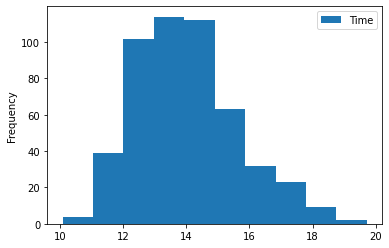

In [10]:
t.plot.hist()# Distribution of the Time variable

In [11]:
t.mean()  #Answer: Average time

Time    14.015647
dtype: float64

In [12]:
t.std()   #Standard Deviation

Time    1.627536
dtype: float64

In [13]:
CI_u, CI_l = (t.mean()+1.96*((t.std())/np.sqrt(len(t)))
              ), (t.mean()-1.96*((t.std())/np.sqrt(len(t))))

In [15]:
CI_u, CI_l #confidence Interval Upper and Lower at 95%

(Time    14.158307
 dtype: float64,
 Time    13.872987
 dtype: float64)

In [16]:
t.min()

Time    10.083333
dtype: float64

In [17]:
t.max()

Time    19.72
dtype: float64